<a href="https://colab.research.google.com/github/leehyunggeunkeun/pytorch-study/blob/master/pytorch_0601_%EC%9E%90%EC%97%B0%EC%96%B4%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#자연어 전처리를 해보자
#이걸 하면서 크롤링도 간단히 해보고 자연어 전처리의 방법등을 알 수 있으니 기본부터 입력하자

네이버 영화 댓글 크롤링(클레멘타인)

In [0]:
# 크롤링 라이브러리 불러오기

import requests
from bs4 import BeautifulSoup

In [3]:
# 개발자도구 들어가서 나오는 url을 입력함
# 예전에 어디서 보기로 페이지가 바뀔때 url이 바뀌면 정적페이지고 그러면 거의 html방식으로 하고 url이 바뀌지않는 동적페이지면 json으로 한다고 했었는데
# 페이지 1,2,3 클릭결과 url 바뀌는거 보고 html이겠거니 생각함....


url='https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=37886&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1'
response=requests.get(url)
html= BeautifulSoup(response.content,'html.parser')
html


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>네이버 영화</title>
<link href="https://ssl.pstatic.net/static/m/movie/icons/naver_movie_favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/css/common.css?20200515103320" rel="stylesheet" type="text/css">
<link href="/css/movie_tablet.css?20200515103320" rel="stylesheet" type="text/css"/>
<link href="/css/movie_end.css?20200515103320" rel="stylesheet" type="text/css"/>
<script src="/js/deploy/movie.all.js?20200515103320" type="text/javascript"></script>
</link></head>
<body>
<!-- content -->
<input id="movieCode" name="movieCode" type="hidden" value="37886"/>
<input id="onlyActualPointYn" name="onlyActualPointYn" type="hidden" value="N"/>
<input id="includeSpoilerYn" name="includeSpoilerYn" type="hidden" value="N"/>
<input id="order" name="order" type="hidden" value="sympathyScore"/>
<input id="page" name="page" type="hidden" value="1"/>
<div class

In [4]:
# 개발자 도구에서 살펴보니 score_result라는 class안에 각각의 li들이 있었으며 이 li는 'star_score' 'scroe_reple' 'btn_area'의 세부 클래스로 구성이 되어있었음.
# 상기 url에서 맨 위에 뜨는 리뷰 '이 영화를 보고 암이 나았습니다' 평점 10이 크롤링한 결과에도 나오는걸 확인

score_result = html.find('div', {'class': 'score_result'})
lis = score_result.findAll('li')
lis[0]

<li>
<div class="star_score">
<span class="st_off"><span class="st_on" style="width:100.0%"></span></span><em>10</em>
</div>
<div class="score_reple">
<p>
<!-- 스포일러 컨텐츠로 처리되는지 여부 -->
<span id="_filtered_ment_0">
														
															
															
																이 영화를 보고 암이 나았습니다. 
															
														
														
													</span>
</p>
<dl>
<dt>
<em>
<a href="#" onclick="javascript:showPointListByNid(7719905, 'after');parent.clickcr(this, 'ara.uid', '', '', event); return false;" target="_top">
<span>maan****</span>
</a>
</em>
<em>2013.07.09 14:25</em>
</dt>
<dd>
<a class="go_report2" href="#" onclick="parent.clickcr(this, 'ara.report', '', '', event); common.report('false','maan****', 'gjTHoYpT+IBSfJd2kYsNhwWvjnNNu6q9enMS7rln1ys=', '이 영화를 보고 암이 나았습니다. ', '7719905', 'point_after', false);return false;"><em>신고</em></a>
</dd>
</dl>
</div>
<div class="btn_area">
<a class="_sympathyButton" href="#" onclick="parent.clickcr(this, 'ara.sym', '', '', event);">
<spa

In [5]:
# scroe_reple아래 텍스트 리뷰는 p라는 클래스로 이루어져있음 , 그리고 양끝공백제거 

review_text = lis[0].find('p').getText()
review_text.strip()

'이 영화를 보고 암이 나았습니다.'

In [6]:
# 점수확인

score = lis[0].find('em').getText()
score

'10'

In [7]:
for lis_ in lis:
    comment = lis_.find('p').getText().strip()
    score = lis_.find('em').getText()
    print(comment,score)

이 영화를 보고 암이 나았습니다. 10
이것은절대1점이아니다11점을주고싶은 내마음이다 1
모니터도 울고 외장하드도 울고 숨어있던 바이러스도 울었다 10
당신이 이 영화를 보지 않았다면  아직 살아있을 이유 하나를 간직하고 있는 것이다. 10
영화계엔 BC와 AC가 있다. Before Clementain, After Clementain... 10
남친 집에서 클레멘타인 DVD를 발견했고, 결혼을 결심했습니다. 10
드디어 보았네요. 나이 40대 중반에 이런 감동을 느낄 수 있음에 스스로도 대견한 생각이 듭니다. 먼 훗날 제 아이들도 이 영화를 보고 저와 같은 감동을 느끼길 바라는 건 그저 바램이겠지요? 10
평점깍아내리는 낚시글 몇개있는데 제발그만해라 이기적인새끼들아좋은건 나누는거다 10
장난으로 쓰지마라... 본인은 2004년에 실제로 극장에서 이 영화를 봤다 10
프로포즈 선물로 다이아반지 대신 클레멘타인 파일을 USB에담아 목걸이로 만들어 그녀 목에 걸어주었다. 눈물로 대신 대답한 그녀...그리고 2세이름은 그녀의 의견을 반영해 이동준과 스티븐시갈의 이름을 딴 이동갈로 지을... 10


In [8]:
import pandas as pd

score_df = pd.DataFrame(columns=['comment','score'])
score_df

,comment,score


In [9]:
page_num = 1
index = 0

#페이지별로 이동하며 모든 리뷰 긁어모음
while True:
    url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=37886&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page={}".format(page_num)
    response = requests.get(url)
    html = BeautifulSoup(response.content, 'html.parser')
    score_result = html.find('div', {'class': 'score_result'})
    lis = score_result.findAll('li')

    for lis_ in lis:
        comment = lis_.find('p').getText().strip().replace("\n","").replace('\t','').replace('\r','') # score_reple클래스의 p에 영화 리뷰가 있음, 줄바꿈 커서  탭이동 맨앞이동을 공백으로 제거 
        comment = comment.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") #정규표현식으로 제거 

        comment = comment.replace("관람객","")
        comment = comment.replace("스포일러가 포함된 감상평입니다.","") 
        comment = comment.replace("감상평 보기","")

        score = lis_.find('em').getText() # star_score 클래스의 em에 점수가 있음
        
        if ('관람객' in comment) or ('관람객' in score):continue
        score_df.loc[index] = [comment,score]

        if index%300==0:
            print(f'{index}의 리뷰를 탐색함')
            print(comment,score)
            print('-------------------'*3)
        index+=1
        
    page_num+=1
    if index>30000:break

0의 리뷰를 탐색함
이 영화를 보고 암이 나았습니다. 10
---------------------------------------------------------
300의 리뷰를 탐색함
남성으로서의 자신감이 부족하여 소변을 앉아서보던 저였습니다만 이영화의 아빠~일어나~! 를 듣는순간 일어서서 소변을 보게되었습니다. 그렇게 새로산 바지를 버렸고 제 안 깊은곳에 나약함도 버렸습니다. 10
---------------------------------------------------------
600의 리뷰를 탐색함
심영에게 이 영화를 보여줬더니 알이 두개 생겼습니다. 10
---------------------------------------------------------
900의 리뷰를 탐색함
평점깍아내리는 낚시글 몇개있는데 제발그만해라 이기적인새끼들아좋은건 나누는거다 10
---------------------------------------------------------
1200의 리뷰를 탐색함
오스카 상을 받아 마땅한 영화, 기생충보다도 평점이 높다 10
---------------------------------------------------------
1500의 리뷰를 탐색함
인생은 B(Birth)와 D(Death) 사이의 C(Clementine)이다 10
---------------------------------------------------------
1800의 리뷰를 탐색함
제가 감히 이 영화를 판단할 자격이될지 모르지만 지금 네이버 담당자에게 건의합니다 10점은 너무 가옥하지않나요? 10
---------------------------------------------------------
2100의 리뷰를 탐색함
저의 인생이 2시간밖에 남지않았다면 저는 클레멘타인을 틀 것 입니다. 10
---------------------------------------------------------
2400의 리뷰를 탐색함
다시봐도 또 보고싶은 명

In [10]:
score_df.head()

,comment,score
0,이 영화를 보고 암이 나았습니다.,10
1,이것은절대1점이아니다11점을주고싶은 내마음이다,1
2,모니터도 울고 외장하드도 울고 숨어있던 바이러스도 울었다,10
3,당신이 이 영화를 보지 않았다면 아직 살아있을 이유 하나를 간직하고 있는 것이다.,10
4,"영화계엔 BC와 AC가 있다. Before Clementain, After Clem...",10


리뷰 전처리

In [11]:
# Mecab

!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 92kB 12.2MB/s 
     |████████████████████████████████| 3.6MB 52.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-06-01 04:01:15--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz

In [0]:
from konlpy.tag import Mecab
import numpy as np
import matplotlib.pyplot as plt

stopwords=['아','후','아이구','어','나','우리','저희','을','를','에','의','가','으로','로','에게','저','도','다','등','제','이','은','들','는','좀','잘','걍','과','도'
,'를','자','와','한','하다'] #한국말 불용어 

tokenizer = Mecab()

In [13]:
# 패딩과 언노운때문에 2가지추가 추가됨. 30001개

print('전체 샘플의 수 : {}'.format(len(score_df)))

전체 샘플의 수 : 30001


In [14]:
temp = tokenizer.morphs(score_df.loc[2,'comment'])
print(temp) #형태소 분석

temp = [word for word in temp if not word in stopwords]
print(temp) #불용어 제거확인

['모니터', '도', '울', '고', '외장', '하드', '도', '울', '고', '숨', '어', '있', '던', '바이러스', '도', '울', '었', '다']
['모니터', '울', '고', '외장', '하드', '울', '고', '숨', '어', '있', '던', '바이러스', '울', '었', '다']


In [0]:
tokenized=[]
for sentence in score_df['comment']:
    temp = []
    temp = tokenizer.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)

In [16]:
print(tokenized[:10])

[['영화', '보', '고', '암', '나', '았', '습니다', '.'], ['이것', '절대', '1', '점', '아니', '다', '11', '점', '을', '주', '고', '싶', '내', '마음', '다'], ['모니터', '울', '고', '외장', '하드', '울', '고', '숨', '어', '있', '던', '바이러스', '울', '었', '다'], ['당신', '영화', '보', '지', '않', '았', '다면', '아직', '살', '아', '있', '을', '이유', '하나', '간직', '하', '고', '있', '것', '다', '.'], ['영화', '계', '엔', 'BC', 'AC', '있', '다', '.', 'Before', 'Clementain', ',', 'After', 'Clementain', '.', '..'], ['남친', '집', '에서', '클레멘타인', 'DVD', '발견', '했', '고', ',', '결혼', '을', '결심', '했', '습니다', '.'], ['드디어', '보', '았', '네요', '.', '나이', '40', '대', '중반', '이런', '감동', '을', '느낄', '수', '있', '음', '스스로', '대견', '생각', '듭니다', '.', '먼', '훗날', '제', '아이', '영화', '보', '고', '저', '같', '감동', '을', '느끼', '길', '바라', '건', '그저', '바램', '겠', '지요', '?'], ['평점', '깍아내리', '낚시', '글', '몇', '개', '있', '는데', '제발', '그만', '해라', '이기', '적', '인', '새끼', '아', '좋', '건', '나누', '거', '다'], ['장난', '쓰', '지', '마', '라', '.', '..', '본인', '2004', '년', '실제로', '극장', '에서', '영화', '봤', '다'], ['프로', '포즈', '선물', '로', '다이아', '반

In [18]:
from nltk import FreqDist
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 15071


In [19]:
vocab['명작']

1918

In [20]:
vocab_size = 500

# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 500


In [0]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [0]:
encoded = []
for line in tokenized: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [23]:
print(encoded[:10])

[[4, 6, 13, 161, 24, 42, 16, 3], [217, 409, 82, 31, 99, 5, 0, 31, 12, 55, 13, 65, 29, 246, 5], [0, 84, 13, 0, 0, 84, 13, 444, 57, 17, 75, 0, 84, 23, 5], [233, 4, 6, 18, 36, 42, 108, 83, 116, 43, 17, 12, 165, 156, 0, 7, 13, 17, 32, 5, 3], [4, 208, 250, 0, 0, 17, 5, 3, 0, 0, 25, 0, 0, 3, 15], [0, 324, 50, 20, 282, 0, 61, 13, 25, 0, 12, 0, 61, 16, 3], [0, 6, 42, 44, 3, 455, 0, 169, 0, 54, 28, 12, 356, 26, 17, 135, 0, 0, 129, 0, 3, 0, 0, 94, 468, 4, 6, 13, 102, 76, 28, 12, 279, 147, 0, 252, 491, 0, 89, 0, 35], [38, 0, 267, 418, 370, 146, 17, 69, 0, 456, 0, 0, 71, 86, 0, 43, 119, 252, 0, 100, 5], [388, 274, 18, 249, 80, 3, 15, 0, 293, 67, 0, 295, 50, 4, 49, 5], [0, 0, 0, 33, 0, 0, 0, 20, 0, 12, 0, 0, 43, 0, 33, 132, 57, 0, 0, 188, 57, 55, 23, 5, 3, 37, 33, 0, 0, 0, 3, 15, 189, 154, 265, 0, 0, 0, 12, 0, 81, 200, 174, 457, 0, 12, 0, 0, 33, 18, 12, 3, 15]]


리뷰의 최대 길이 : 81
리뷰의 최소 길이 : 0
리뷰의 평균 길이 : 13.689544


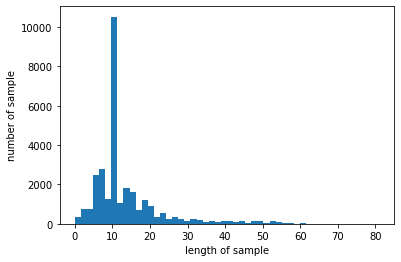

In [24]:
max_len = max(len(l) for l in encoded)

print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

# 자연어의 경우 최대길이인 81에 맞추어서 채워줘야하므로 모든 길이를 최대길이인 81에 맞추어야함.

In [0]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

In [26]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 81
리뷰의 최소 길이 : 81
리뷰의 평균 길이 : 81.000000


In [29]:
print(encoded[0])

[4, 6, 13, 161, 24, 42, 16, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [30]:
len(score_df)

30001

In [0]:
train_df = score_df[:24000]
test_df = score_df[24000:]

train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

In [0]:
from torchtext import data # torchtext.data 임포트
from konlpy.tag import Mecab

# Mecab을 토크나이저로 사용
tokenizer = Mecab()

In [0]:
# 필드 정의
TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=tokenizer.morphs, # 토크나이저로는 Mecab 사용.
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   is_target=True)

In [0]:
from torchtext.data import TabularDataset
train_data, test_data = TabularDataset.splits(
    path='.', train='train_data.csv', test='test_data.csv', format='csv',
    fields=[('comment', TEXT), ('score', LABEL)], skip_header=True)

In [110]:
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

훈련 샘플의 개수 : 24000
테스트 샘플의 개수 : 6001


In [111]:
print(vars(train_data[10]))

{'comment': ['내', '가', '가장', '부러운', '사람', '은', '이', '영화', '를', '아직', '보', '지', '않', '은', '사람', '이', '다', '.', '.', '보', '기', '전', '으로', '돌아가', '그때', '에', '느꼈', '던', '감동', '을', '다시', '느끼', '고', '싶', '다', '.', '..'], 'score': '10'}


In [112]:
TEXT.build_vocab(train_data, min_freq=1)
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))

단어 집합의 크기 : 14991


In [0]:
TEXT.build_vocab(train_data, min_freq=10, max_size=10000)

In [114]:
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))

단어 집합의 크기 : 2290


In [115]:
print(TEXT.vocab.stoi)

defaultdict(<function _default_unk_index at 0x7ff30077a598>, {'<unk>': 0, '<pad>': 1, '.': 2, '이': 3, '영화': 4, '는': 5, '다': 6, '보': 7, '을': 8, 'ㄷ': 9, '의': 10, '하': 11, '를': 12, '고': 13, '에': 14, '들': 15, '!': 16, '가': 17, '은': 18, '..': 19, '습니다': 20, '있': 21, '지': 22, '도': 23, '한': 24, '없': 25, '클레멘타인': 26, '대단': 27, '수준': 28, '최고': 29, '충': 30, '한남': 31, '게': 32, '었': 33, ',': 34, '나': 35, '수': 36, '명작': 37, '감동': 38, '내': 39, '말': 40, '점': 41, '것': 42, '로': 43, '인생': 44, '?': 45, '않': 46, '눈물': 47, '평점': 48, '입니다': 49, '할': 50, '10': 51, '았': 52, '아': 53, '네요': 54, '기': 55, '만': 56, '번': 57, '안': 58, '봤': 59, '에서': 60, '으로': 61, '과': 62, '되': 63, '꼭': 64, '정말': 65, '이런': 66, '주': 67, '전': 68, '어': 69, '한국': 70, '일어나': 71, '아빠': 72, '했': 73, '그': 74, '본': 75, '사람': 76, '싶': 77, '합니다': 78, '년': 79, '...': 80, '는데': 81, '면': 82, '와': 83, '적': 84, '진짜': 85, 'ㅋㅋㅋ': 86, '다시': 87, '던': 88, '같': 89, '볼': 90, '필요': 91, '때': 92, '라': 93, '해': 94, '1': 95, '아직': 96, '울': 97, '알': 98, '인': 99,

In [0]:
#텍스트의 데이터로더 개념
from torchtext.data import Iterator

In [0]:
batch_size = 64

train_loader = Iterator(dataset=train_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)

In [118]:
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

훈련 데이터의 미니 배치 수 : 375
테스트 데이터의 미니 배치 수 : 94


In [119]:
batch = next(iter(train_loader)) # 첫번째 미니배치
print(batch.comment)
print(batch.score)

tensor([[ 167,    5,  126,  ...,   78,    2,    2],
        [ 851,    3,    0,  ...,    1,    1,    1],
        [   0,  136,   57,  ...,    1,    1,    1],
        ...,
        [  31,   30,   15,  ...,    1,    1,    1],
        [ 256,   18,   38,  ...,    1,    1,    1],
        [1039,  166,  183,  ...,    1,    1,    1]])
tensor([10,  1,  9, 10, 10, 10, 10, 10,  1, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
         1, 10, 10, 10, 10, 10, 10, 10,  1, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10,  1, 10,  1, 10,  1, 10, 10])


GPU사용

In [120]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


모델생성 pytorch

In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

learning_rate = 0.05
training_epochs = 10

In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(nn.Linear(20, 32),
                                   nn.ReLU(),
                                   nn.Linear(32, 64),
                                   nn.ReLU(),
                                   nn.Linear(64, 128),
                                   nn.ReLU(),
                                   nn.Linear(128, 256),
                                   nn.ReLU(),
                                   nn.Linear(256,11) 
                                   )

    def forward(self, x):
        out = self.layer(x)
        return out

In [0]:
model = Classifier()
criterion = torch.nn.CrossEntropyLoss()   
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [141]:
total_batch = len(train_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 375


In [142]:
next(iter(train_loader))


[torchtext.data.batch.Batch of size 64]
	[.comment]:[torch.LongTensor of size 64x20]
	[.score]:[torch.LongTensor of size 64]

In [144]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in train_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(torch.float)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        print(cost)
        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

tensor(7.9169, grad_fn=<NllLossBackward>)
tensor(286.9445, grad_fn=<NllLossBackward>)
tensor(12.7065, grad_fn=<NllLossBackward>)
tensor(3.8122, grad_fn=<NllLossBackward>)
tensor(1.2897, grad_fn=<NllLossBackward>)
tensor(0.9108, grad_fn=<NllLossBackward>)
tensor(0.9712, grad_fn=<NllLossBackward>)
tensor(1.2307, grad_fn=<NllLossBackward>)
tensor(0.9747, grad_fn=<NllLossBackward>)
tensor(1.2536, grad_fn=<NllLossBackward>)
tensor(1.2633, grad_fn=<NllLossBackward>)
tensor(5.5315, grad_fn=<NllLossBackward>)
tensor(1.0993, grad_fn=<NllLossBackward>)
tensor(1.0895, grad_fn=<NllLossBackward>)
tensor(0.7959, grad_fn=<NllLossBackward>)
tensor(0.8370, grad_fn=<NllLossBackward>)
tensor(1.2430, grad_fn=<NllLossBackward>)
tensor(0.6126, grad_fn=<NllLossBackward>)
tensor(0.5709, grad_fn=<NllLossBackward>)
tensor(1.0883, grad_fn=<NllLossBackward>)
tensor(0.6549, grad_fn=<NllLossBackward>)
tensor(0.4766, grad_fn=<NllLossBackward>)
tensor(0.9993, grad_fn=<NllLossBackward>)
tensor(0.6503, grad_fn=<NllLoss

쇼생크탈출 대본 

In [146]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=f1e92c538bd72cc5cd1b59ff100fc1548165c7442678a535079714ff4365eb85
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [157]:
#wget으로 내 깃허브에 올린 쇼생크탈출 url을 통해 다운로드
#imdb에서 가장 평점이 높은 쇼생크탈출의 대본

!wget 'https://raw.githubusercontent.com/leehyunggeunkeun/pytorch-study/master/%EC%87%BC%EC%83%9D%ED%81%AC%ED%83%88%EC%B6%9C.txt'

--2020-06-01 04:36:11--  https://raw.githubusercontent.com/leehyunggeunkeun/pytorch-study/master/%EC%87%BC%EC%83%9D%ED%81%AC%ED%83%88%EC%B6%9C.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180784 (177K) [text/plain]
Saving to: ‘쇼생크탈출.txt’

쇼생크탈출.txt      100%[===================>] 176.55K  --.-KB/s    in 0.03s   

2020-06-01 04:36:12 (6.77 MB/s) - ‘쇼생크탈출.txt’ saved [180784/180784]



In [165]:
input_file = open('쇼생크탈출.txt','r')
lines = input_file.readlines()
lines[:10]

['     THE SHAWSHANK REDEMPTION\n',
 '\n',
 '                                 by\n',
 '\n',
 '                           Frank Darabont\n',
 '\n',
 '\n',
 '                        Based upon the story \n',
 '                Rita Hayworth and Shawshank Redemption\n',
 '\t                   by Stephen King\n']

In [0]:
import re

temp_sentence = ''
raw_sentence = ''

#정규표현식으로 영어에 맞게 제거 

for line in lines:
    line = re.sub('[^a-zA-Z0-9.]',' ',line.lower())
    raw_sentence+=line

In [167]:
splited_sentence = raw_sentence.split('.')
splited_sentence[:10]

['     the shawshank redemption                                   by                             frank darabont                           based upon the story                  rita hayworth and shawshank redemption                     by stephen king    1 int    cabin    night  1946     a dark  empty room',
 '    the door bursts open',
 ' a man and woman enter  drunk and   giggling  horny as hell',
 ' no sooner is the door shut than   they re all over each other  ripping at clothes  pawing at   flesh  mouths locked together',
 '    he gropes for a lamp  tries to turn it on  knocks it over   instead',
 ' hell with it',
 ' he s got more urgent things to do  like   getting her blouse open and his hands on her breasts',
 ' she   arches  moaning  fumbling with his fly',
 ' he slams her against   the wall  ripping her skirt',
 ' we hear fabric tear']

In [0]:
cleansed_splited_sentence = []

for sentence in splited_sentence:
    temp_sentence = ''
    words = sentence.split(' ')
    for word in words:
        if word !='':
            temp_sentence+=word+' '
    if temp_sentence[:-1] == '':continue
    cleansed_splited_sentence.append(temp_sentence[:-1])

In [169]:
cleansed_splited_sentence[:10]

['the shawshank redemption by frank darabont based upon the story rita hayworth and shawshank redemption by stephen king 1 int cabin night 1946 a dark empty room',
 'the door bursts open',
 'a man and woman enter drunk and giggling horny as hell',
 'no sooner is the door shut than they re all over each other ripping at clothes pawing at flesh mouths locked together',
 'he gropes for a lamp tries to turn it on knocks it over instead',
 'hell with it',
 'he s got more urgent things to do like getting her blouse open and his hands on her breasts',
 'she arches moaning fumbling with his fly',
 'he slams her against the wall ripping her skirt',
 'we hear fabric tear']

In [170]:
splited_word = []
for sentence in cleansed_splited_sentence:
    words = sentence.split(' ')
    splited_word+=words
            
splited_word[:10]

['the',
 'shawshank',
 'redemption',
 'by',
 'frank',
 'darabont',
 'based',
 'upon',
 'the',
 'story']

In [172]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import numpy as np
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english')) 
stopwords.words('english')[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [0]:
result = []
for word in splited_word:
    if word not in stop_words:
        result.append(word)

In [174]:
result[:10]

['shawshank',
 'redemption',
 'frank',
 'darabont',
 'based',
 'upon',
 'story',
 'rita',
 'hayworth',
 'shawshank']

In [175]:
vocab = FreqDist(np.hstack(result))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 4392


In [176]:
vocab['surprise'] #surprise는 4개만 나옴 

4

In [177]:
vocab_size = 1000
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 1000


In [0]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [0]:
encoded = []
for line in result: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [184]:
print(encoded[:10])

[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 250, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 250, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [0]:
max_len = max(len(l) for l in encoded)

In [186]:
print('대본의 최대 길이 : %d' % max_len)
print('대본의 최소 길이 : %d' % min(len(l) for l in encoded))
print('대본의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

대본의 최대 길이 : 17
대본의 최소 길이 : 1
대본의 평균 길이 : 5.084304


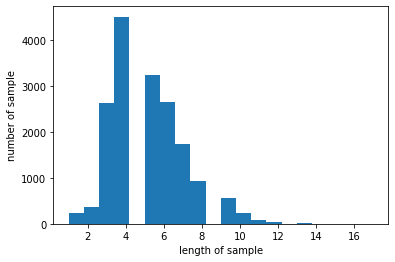

In [188]:
plt.hist([len(s) for s in encoded], bins=20)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [0]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

In [190]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 17
리뷰의 최소 길이 : 17
리뷰의 평균 길이 : 17.000000


In [191]:
print(encoded[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]
